In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [9]:
# load the dataset
%run ../Jane/extract_data.py

Your data is ready! Merged table name is zillow_full.


In [10]:
# drop the columns that will not be used
zillow_full.drop(['AQIMean','PersonalIncome','Vol_moderate_income','Vol_low_income'],axis=1,inplace=True)
# set date index for ease
#zillow_full.set_index('Date',inplace=True)

# features i have engineered:
- poverty
- (un)employment
- nightlife/entertainment
- pct college
- commute time
- move within/ move new city
- home density (pop/households)
- housing avaialbility (n_units /households)


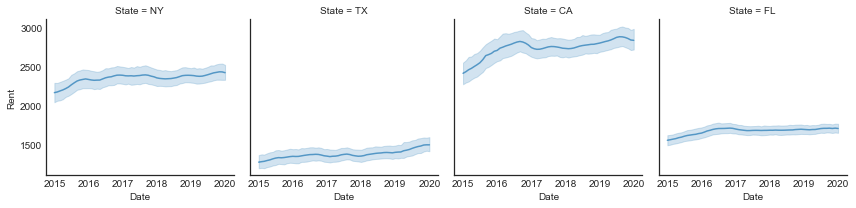

In [11]:
# rent over time in 4 areas
g = sns.FacetGrid(zillow_full.reset_index(), col="State")
g.map(sns.lineplot, "Date", "Rent", alpha=.7)

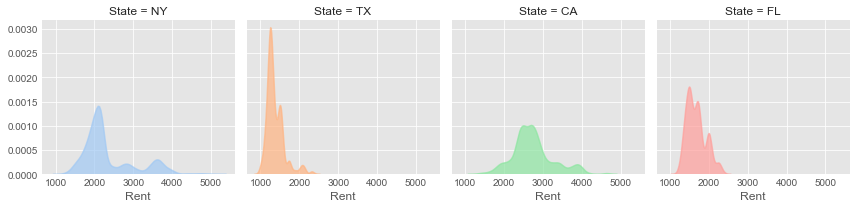

In [16]:
# density plot of the rent distribution
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "Rent", alpha=.7,shade=True)

In [7]:
zillow_full.columns

Index(['Zipcode', 'City', 'State', 'Metro', 'County', 'SizeRank', 'Date',
       'Rent', 'Year', 'State-County', 'total_pop', 'households', 'median_age',
       'median_income', 'income_per_capita', 'gini_index', 'pct_poverty',
       'housing_availability', 'home_density', 'pct_employed',
       'pct_jobs_nightlife', 'pct_unemployed', 'move_within_city',
       'move_new_city', 'avg_commute_time', 'pct_college'],
      dtype='object')

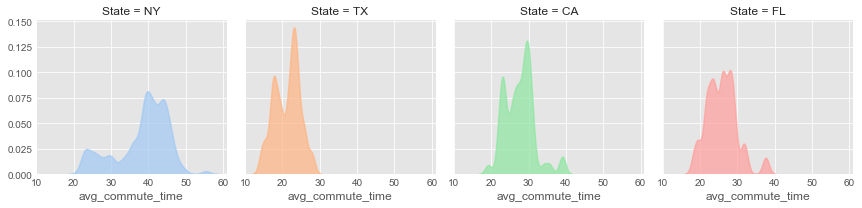

In [19]:
# density plot of the commute time distribution
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "avg_commute_time", alpha=.7,shade=True)

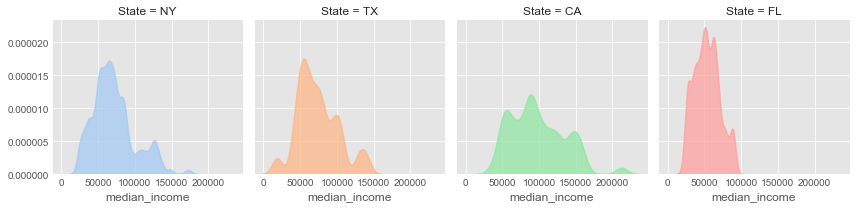

In [20]:
# density plot of the commute time distribution
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "median_income", alpha=.7,shade=True)

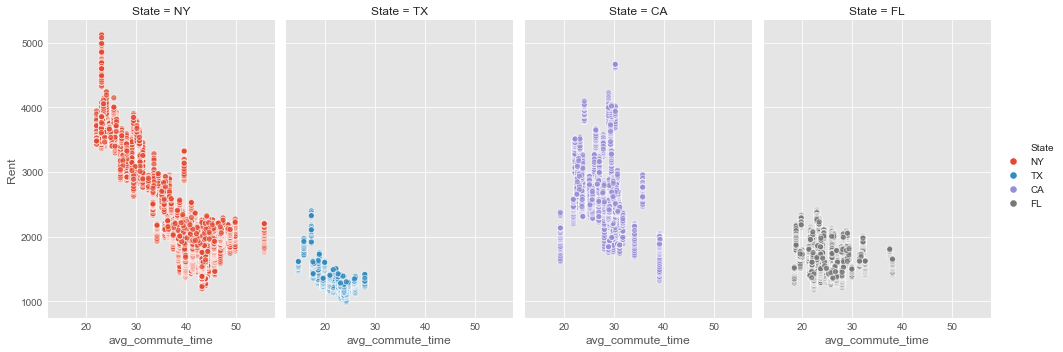

In [21]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="avg_commute_time", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

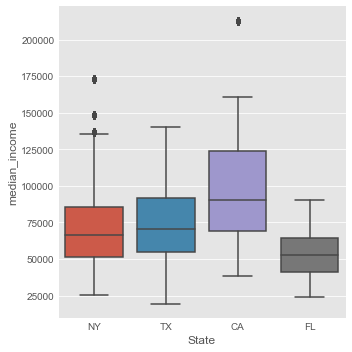

In [22]:
sns.catplot(data=zillow_full,x = 'State',y='median_income',kind="box")

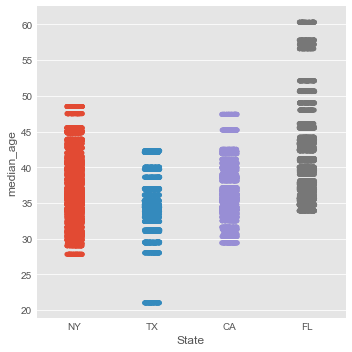

In [18]:
sns.catplot(data=zillow_full,x = 'State',y='median_age')

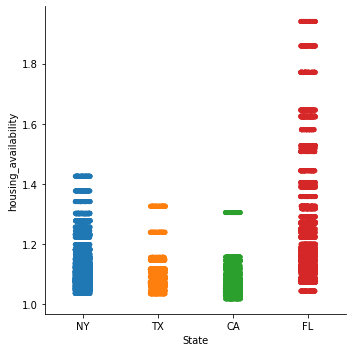

In [64]:
sns.catplot(data=zillow_full,x ='State',y='housing_availability')

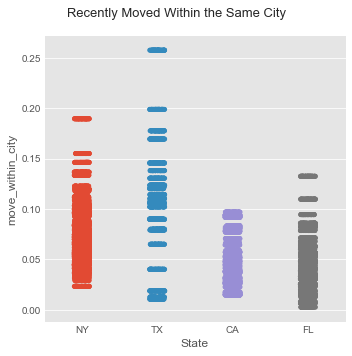

In [37]:
g = sns.catplot(data=zillow_full,x ='State',y='move_within_city')
g.fig.suptitle("Recently Moved Within the Same City",fontsize=13)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

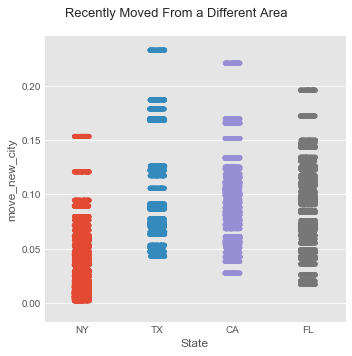

In [39]:
h = sns.catplot(data=zillow_full,x ='State',y='move_new_city')
h.fig.suptitle("Recently Moved From a Different Area",fontsize=13)
h.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

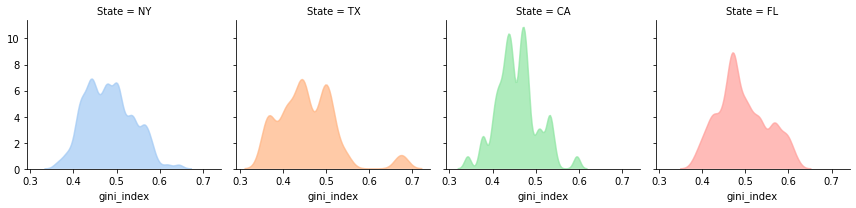

In [68]:
# density plot of the gini index
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "gini_index", alpha=.7,shade=True)

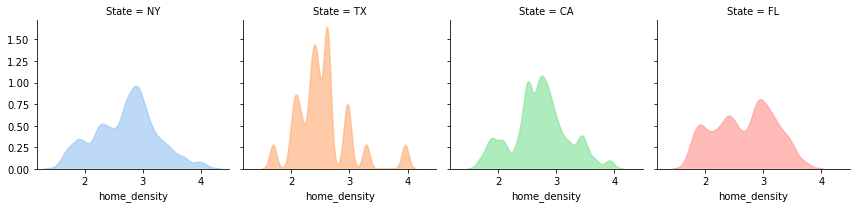

In [43]:
# density plot of the approx. household size
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "home_density", alpha=.7,shade=True)

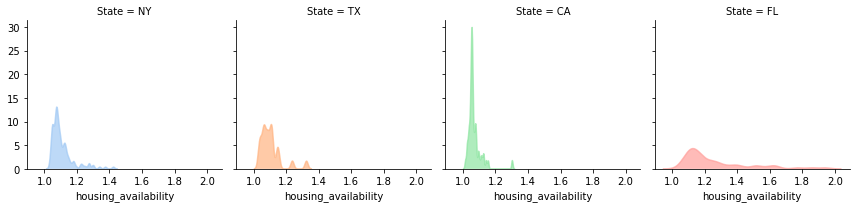

In [44]:
# density plot of the approx. housing availability
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "housing_availability", alpha=.7,shade=True)

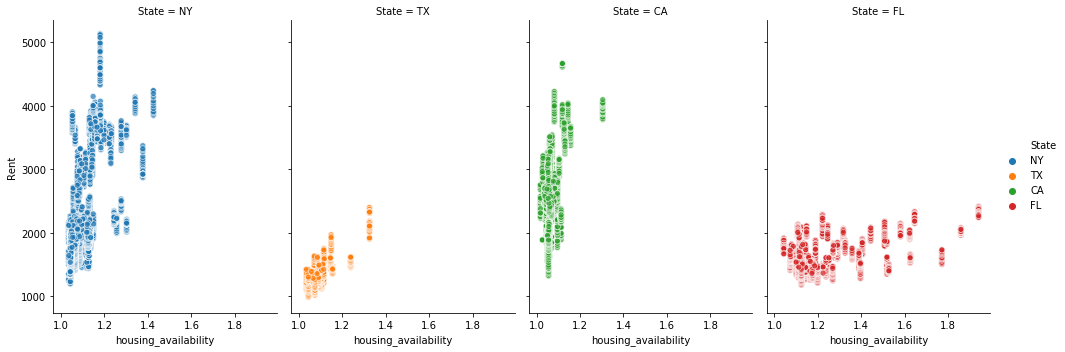

In [46]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="housing_availability", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

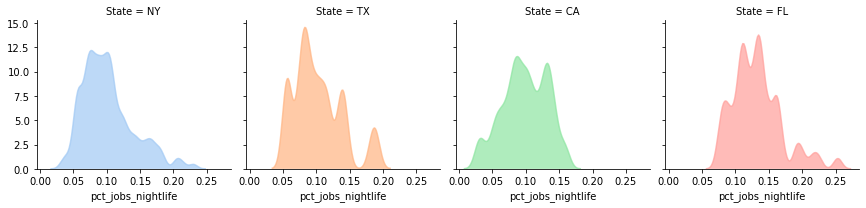

In [49]:
# density plot of the approx. housing availability
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "pct_jobs_nightlife", alpha=.7,shade=True)

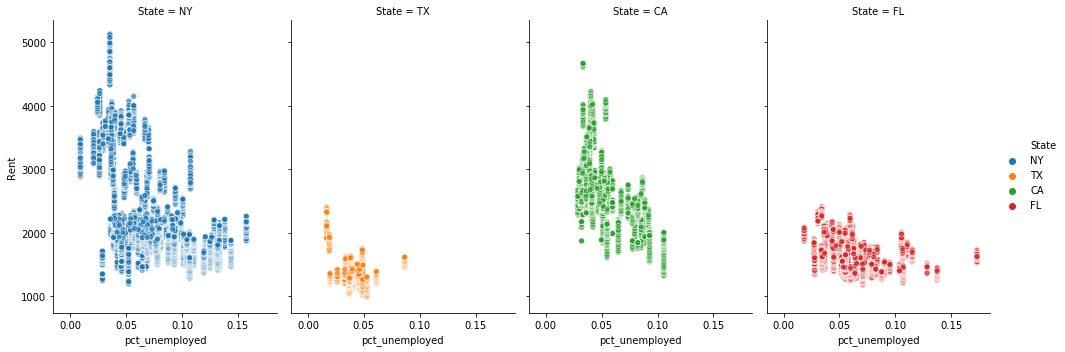

In [57]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="pct_unemployed", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

In [114]:
nydata = zillow_full[zillow_full['State']=='NY']

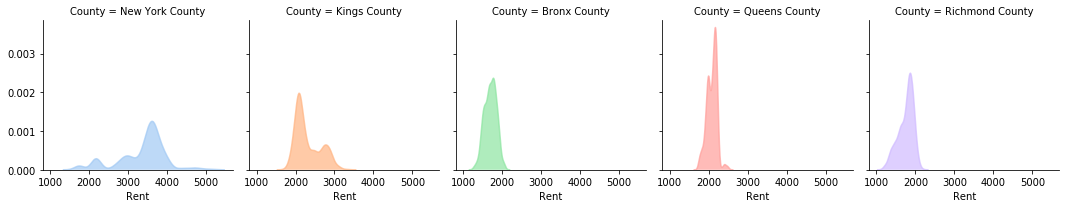

In [154]:
# density plot of the approx. housing availability
g = sns.FacetGrid(nydata, col="County",hue="County",palette="pastel")
g.map(sns.kdeplot, "Rent", alpha=.7,shade=True)

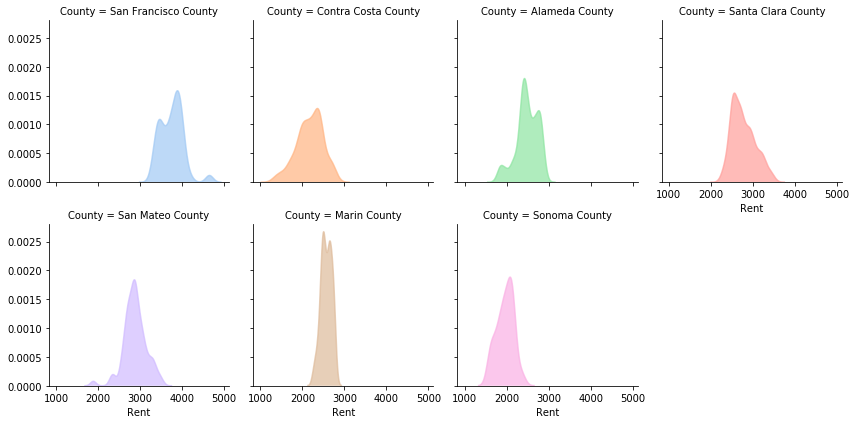

In [153]:
ca_data = zillow_full[zillow_full['State']=='CA']
# density plot of the approx. housing availability
g = sns.FacetGrid(ca_data, col="County",col_wrap=4,hue="County",palette="pastel")
g.map(sns.kdeplot, "Rent", alpha=.7,shade=True)

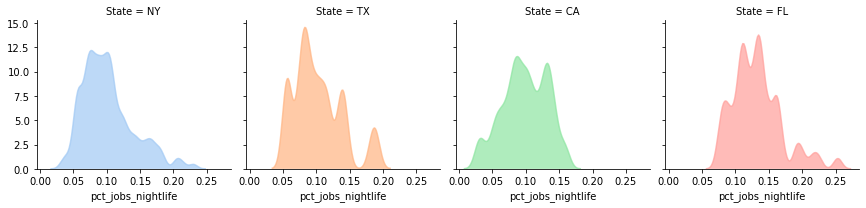

In [142]:
# density plot of the approx. housing availability
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "pct_jobs_nightlife", alpha=.7,shade=True)

In [55]:
zillow_full['log_median_income'] = np.log(zillow_full['median_income'])

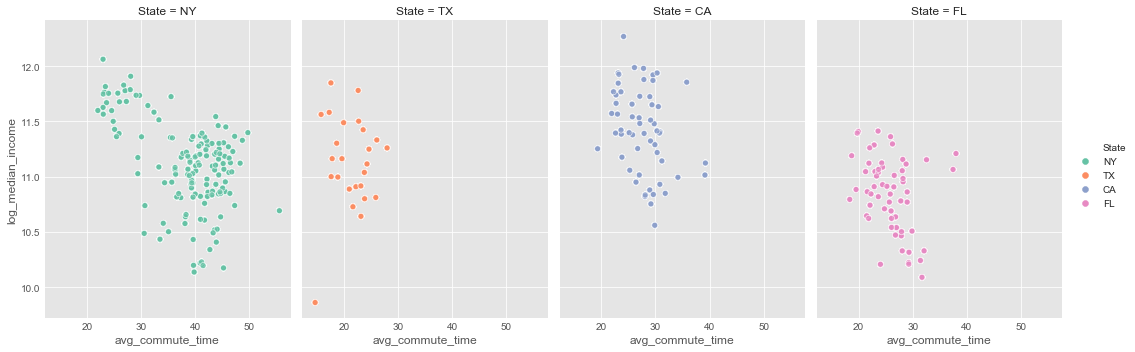

In [56]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="avg_commute_time", y='log_median_income', hue="State", col="State",
            aspect=.75,alpha=.7,palette="Set2")